<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/Simulacion-I/blob/main/prueba_frecuencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRUEBA DE FRECUENCIAS

##SIMULACIÓN

**Estudiante:** Karla Michelle Soriano Sánchez

**Objetivo**: Elaborar un código en Python que implemente la Prueba de Frecuencias para evaluar si un conjutno de números pseudoaleatorios sigue una distribución uniforme en el intervalo (0,1)

Definiremos la prueba de hipotesis de la siguiente manera:

- $H_0$: La muestra proviene de $U(0,1)$

- $H_1$: La muestra NO proviene de $U(0,1)$




Considerando que una distrución uniforme por definición es:

$ U_i ∼ U(0,1)$ para $i=0,1,2, …, n$

En otras palabras
$
f(x) = \begin{cases}
\frac{1}{b-a} & a \le 0 \le b\\
0 & otro \quad caso
\end{cases}
$

donde $a=0$ y $b=1$

Además recordando que si el conjunto de números (datos de la tabla) aleatorios, provienen de una distribución uniforme entonces se debe cumplir:


  - Media

  $$\mu = E[x]= \frac{1}{2}$$

  - Varianza

  $$Var(X)= \mu^2=  \frac{1}{12}$$

  $$ \sigma = \sqrt{\frac{1}{12}} $$


- Para una muestra de tamaño $n$, la **media muestral** o tambien conocida como promedio es:

$$\bar{X}= \frac{1}{n} \sum_{i=1}^{n} X_i $$

$$ \bar{X} = \frac{U_1 + U_2+ \dots U_n}{n} = 0.4826878$$


Dado que la tabla es de *20 filas x 5 columnas*, entonces la muestra es de tamaño $n= 100 $.
El estadistico de prueba es:


$$Z= \frac{\bar{X} - \mu}{\sigma/ \sqrt{n}} $$

o tambien lo podemos escribir de esta manera

$Z_0=\frac{(\bar{X}-0.5)\sqrt{n}}{\sqrt{\frac{1}{12}}}$

$Z_0=\frac{(0.4826878-0.5)10}{\sqrt{\frac{1}{12}}}= -0.599712$


donde n es el número total de datos.



Por otro lado se considera el nivel de confianza $\alpha$, un valor común es $\alpha=0.05$, de modo que puntos criticos se calculan como:

$$
Z_{\alpha/2} = Z_{0.025} =\pm  1.96
$$



Regla de decisión:

* Rechazar $H_0$ si $|Z| > 1.96$

* No rechazar $H_0$ si $|Z| \le 1.96$


In [32]:
import numpy as np #utilizada para calcular la media
from scipy.stats import chi2 #utilizada para calcular el valor critico
import pandas as pd
import tabulate
import matplotlib.pyplot as plt

In [33]:
#son los datos proporcionados en la imagen

data = [
0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
0.79882, 0.45679, 0.21631, 0.87616, 0.55743,
0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
0.58244, 0.85853, 0.86752, 0.38729, 0.15506,
0.23949, 0.53559, 0.33381, 0.49883, 0.75103,
0.19962, 0.65002, 0.74579, 0.79113, 0.63453,
0.19147, 0.40644, 0.08128, 0.73435, 0.22724,
0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]

n=len(data)
print(f"El número total de datos es: {n}")

El número total de datos es: 100


In [34]:
def prueba_frecuencias(datos, k, alpha):
    """
    Aplica la prueba de frecuencias para verificar la uniformidad
    de un conjunto de números en el intervalo (0,1).

    Parámetros:
    datos : lista o arreglo de números
    k     : número de intervalos
    alpha : nivel de significancia

    Retorna:
    Estadístico chi-cuadrada calculado y decisión de la prueba.
    """

    n = len(datos)

    # Construcción de intervalos equidistantes
    intervalos = np.linspace(0,1,k+1)

    # Cálculo de frecuencias observadas
    frecuencias_obs, _ = np.histogram(datos, bins=intervalos)

    # Frecuencia esperada bajo uniformidad
    frecuencia_esp = n / k

    # Cálculo del estadístico chi-cuadrada
    chi_calculado = np.sum((frecuencias_obs - frecuencia_esp)**2 / frecuencia_esp)

    # Valor crítico
    gl = k - 1
    chi_critico = chi2.ppf(1 - alpha, gl)

    # Construcción de tabla
    tabla = pd.DataFrame({
        "Intervalo": [f"[{intervalos[i]:.1f},{intervalos[i+1]:.1f})" for i in range(k)],
        "FO": frecuencias_obs,
        "FE": [frecuencia_esp]*k
    })

    return tabla, chi_calculado, chi_critico

In [35]:
k = 10
alpha = 0.05

tabla, chi_calc, chi_crit = prueba_frecuencias(data, k, alpha)

tabla

,Intervalo,FO,FE
0,"[0.0,0.1)",10,10.0
1,"[0.1,0.2)",11,10.0
2,"[0.2,0.3)",11,10.0
3,"[0.3,0.4)",11,10.0
4,"[0.4,0.5)",8,10.0
5,"[0.5,0.6)",11,10.0
6,"[0.6,0.7)",10,10.0
7,"[0.7,0.8)",13,10.0
8,"[0.8,0.9)",10,10.0
9,"[0.9,1.0)",5,10.0


Definimos la función para implemetar la prueba de los promedios

In [39]:
def prueba_frecuencias(datos, k, alpha):

    n = len(datos)
    intervalos = np.linspace(0,1,k+1)

    # Frecuencias observadas
    frecuencias_obs, _ = np.histogram(datos, bins=intervalos)

    # Frecuencia esperada
    frecuencia_esp = n / k

    # Cálculo parcial
    chi_parcial = (frecuencias_obs - frecuencia_esp)**2 / frecuencia_esp

    # Estadístico total
    chi_calculado = np.sum(chi_parcial)

    # Valor crítico
    gl = k - 1
    chi_critico = chi2.ppf(1 - alpha, gl)

    # Construcción de tabla completa
    tabla = pd.DataFrame({
        "Intervalo": [f"[{intervalos[i]:.1f},{intervalos[i+1]:.1f})" for i in range(k)],
        "FO": frecuencias_obs,
        "FE": [frecuencia_esp]*k,
        "(FO-FE)^2/FE": chi_parcial
    })

    return tabla, chi_calculado, chi_critico

In [40]:
k = 10
alpha = 0.05

tabla, chi_calc, chi_crit = prueba_frecuencias(data, k, alpha)

tabla

,Intervalo,FO,FE,(FO-FE)^2/FE
0,"[0.0,0.1)",10,10.0,0.0
1,"[0.1,0.2)",11,10.0,0.1
2,"[0.2,0.3)",11,10.0,0.1
3,"[0.3,0.4)",11,10.0,0.1
4,"[0.4,0.5)",8,10.0,0.4
5,"[0.5,0.6)",11,10.0,0.1
6,"[0.6,0.7)",10,10.0,0.0
7,"[0.7,0.8)",13,10.0,0.9
8,"[0.8,0.9)",10,10.0,0.0
9,"[0.9,1.0)",5,10.0,2.5


In [41]:
print("Chi-cuadrada calculado:", round(chi_calc,4))
print("Chi-cuadrada crítico:", round(chi_crit,4))

if chi_calc < chi_crit:
    print("No se rechaza H0")
else:
    print("Se rechaza H0")

Chi-cuadrada calculado: 4.2
Chi-cuadrada crítico: 16.919
No se rechaza H0


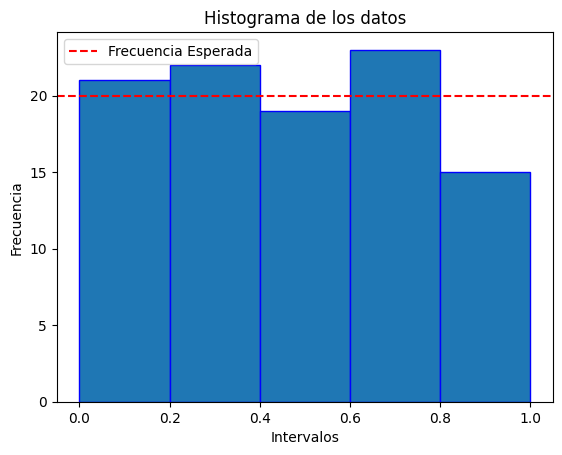

In [38]:
intervalos = [0,0.2,0.4,0.6,0.8,1.0]
plt.hist(data,bins=intervalos, edgecolor="blue")
plt.title("Histograma de los datos")
plt.xlabel("Intervalos")
plt.ylabel("Frecuencia")
plt.axhline(fe,color="red", linestyle="--", label="Frecuencia Esperada")
plt.legend()
plt.show()
